# Analyse Sources

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/02/06
- update : 2023/02/06 
- use jupyter kernel LSST


In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice

In [2]:
import matplotlib.dates as mdates

In [3]:
from collections import OrderedDict

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


# Config

In [6]:
!ls ../data_Tables

Table_icExpBackground_20230117.csv Table_icSrc_20230117.csv
Table_icExpBackground_20230118.csv Table_icSrc_20230118.csv
Table_icExpBackground_20230119.csv Table_icSrc_20230119.csv
Table_icExpBackground_20230131.csv Table_icSrc_20230131.csv
Table_icExpBackground_20230201.csv Table_icSrc_20230201.csv
Table_icExpBackground_20230202.csv Table_icSrc_20230202.csv


In [7]:
path = "../data_Tables"

In [8]:
date_to_file = OrderedDict( {
    20230117 :"Table_icSrc_20230117.csv",
    20230118 :"Table_icSrc_20230118.csv",
    20230119 :"Table_icSrc_20230119.csv",
    20230131 :"Table_icSrc_20230131.csv",
    20230201 :"Table_icSrc_20230201.csv",
    20230202 :"Table_icSrc_20230202.csv",
})

In [9]:
date_sel = 20230202

In [10]:
filename = date_to_file[date_sel]

In [11]:
fullfilename = os.path.join(path,filename)

# Read

In [12]:
df= pd.read_csv(fullfilename,index_col=0)

In [13]:
df

,id,parent,calib_psf_candidate,calib_psf_used,calib_psf_reserved,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,...,slot_PsfFlux_flag_edge,base_ClassificationExtendedness_value,base_ClassificationExtendedness_flag,base_FootprintArea_value,visid_idx,seq_num,day_obs,exposure,dateobs,mjd
0,2121290325088534529,0,False,False,False,1272.000000,1272.000000,35.000000,35.000000,NaN,...,True,NaN,True,374,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.240270
1,2121290325088534530,0,False,False,False,295.618633,295.618633,169.698041,169.698041,1.058786,...,False,1.0,False,1035,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.240270
2,2121290325088534531,0,False,False,False,1459.739354,1459.739354,178.143859,178.143859,0.184118,...,False,1.0,False,1194,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.240270
3,2121290325088534532,0,False,False,False,915.000802,915.000802,214.963605,214.963605,0.048903,...,False,NaN,True,261,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.240270
4,2121290325088534533,0,False,False,False,1236.112744,1236.112744,280.971277,280.971277,0.030390,...,False,0.0,False,1220,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.240270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2121290324792836187,0,False,False,False,253.021836,253.021836,3807.182206,3807.182206,0.067664,...,False,NaN,True,233,67,396,20230201,2023020100396,2023-02-02 02:25:37.576,59977.101129
91,2121290324792836188,0,False,False,False,2061.979254,2061.979254,3928.976789,3928.976789,0.007960,...,False,NaN,True,419,67,396,20230201,2023020100396,2023-02-02 02:25:37.576,59977.101129
92,2121290324792836189,0,False,False,False,1929.014300,1929.014300,3929.121281,3929.121281,0.076200,...,False,NaN,True,233,67,396,20230201,2023020100396,2023-02-02 02:25:37.576,59977.101129
93,2121290324792836190,0,False,False,False,58.918342,58.918342,3945.017347,3945.017347,0.006745,...,False,NaN,True,436,67,396,20230201,2023020100396,2023-02-02 02:25:37.576,59977.101129


In [14]:
list(df.columns.values)

['id',
 'parent',
 'calib_psf_candidate',
 'calib_psf_used',
 'calib_psf_reserved',
 'base_SdssCentroid_x',
 'slot_Centroid_x',
 'base_SdssCentroid_y',
 'slot_Centroid_y',
 'base_SdssCentroid_xErr',
 'slot_Centroid_xErr',
 'base_SdssCentroid_yErr',
 'slot_Centroid_yErr',
 'base_SdssCentroid_flag',
 'base_CircularApertureFlux_flag_badCentroid',
 'base_GaussianFlux_flag_badCentroid',
 'base_PsfFlux_flag_badCentroid',
 'ext_shapeHSM_HsmSourceMoments_flag_badCentroid',
 'slot_Centroid_flag',
 'base_SdssCentroid_flag_edge',
 'base_CircularApertureFlux_flag_badCentroid_edge',
 'base_GaussianFlux_flag_badCentroid_edge',
 'base_PsfFlux_flag_badCentroid_edge',
 'ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge',
 'slot_Centroid_flag_edge',
 'base_SdssCentroid_flag_noSecondDerivative',
 'base_CircularApertureFlux_flag_badCentroid_noSecondDerivative',
 'base_GaussianFlux_flag_badCentroid_noSecondDerivative',
 'base_PsfFlux_flag_badCentroid_noSecondDerivative',
 'ext_shapeHSM_HsmSourceMoments_f

In [15]:
visits_indexes = df.visid_idx.unique()
visits_indexes 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

In [16]:
visit_sel = 0

In [17]:
df_visit_sel = df[df.visid_idx == visits_indexes[visits_indexes[visit_sel]] ] 

In [18]:
the_date_obs=df_visit_sel.dateobs.unique()[0]
the_date_obs

'2023-02-02 05:45:59.339'

In [19]:
df_visit_sel 

,id,parent,calib_psf_candidate,calib_psf_used,calib_psf_reserved,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,...,slot_PsfFlux_flag_edge,base_ClassificationExtendedness_value,base_ClassificationExtendedness_flag,base_FootprintArea_value,visid_idx,seq_num,day_obs,exposure,dateobs,mjd
0,2121290325088534529,0,False,False,False,1272.000000,1272.000000,35.000000,35.000000,NaN,...,True,NaN,True,374,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.24027
1,2121290325088534530,0,False,False,False,295.618633,295.618633,169.698041,169.698041,1.058786,...,False,1.0,False,1035,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.24027
2,2121290325088534531,0,False,False,False,1459.739354,1459.739354,178.143859,178.143859,0.184118,...,False,1.0,False,1194,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.24027
3,2121290325088534532,0,False,False,False,915.000802,915.000802,214.963605,214.963605,0.048903,...,False,NaN,True,261,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.24027
4,2121290325088534533,0,False,False,False,1236.112744,1236.112744,280.971277,280.971277,0.030390,...,False,0.0,False,1220,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.24027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2121290325088534653,0,False,False,False,2264.881154,2264.881154,3804.358990,3804.358990,0.005553,...,False,NaN,True,456,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.24027
125,2121290325088534654,0,False,False,False,253.002940,253.002940,3807.219716,3807.219716,0.069474,...,False,NaN,True,226,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.24027
126,2121290325088534655,0,False,False,False,2061.978627,2061.978627,3928.977410,3928.977410,0.007918,...,False,NaN,True,429,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.24027
127,2121290325088534656,0,False,False,False,1929.085253,1929.085253,3929.098714,3929.098714,0.078641,...,False,NaN,True,228,0,678,20230201,2023020100678,2023-02-02 05:45:59.339,59977.24027


In [20]:
colnumns_names = list(df_visit_sel.columns.values)

In [22]:
mind

2121290325088534529

In [35]:
data = df_visit_sel["base_SdssCentroid_x"].values

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_23247/3998303050.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.hist(data.astype(np.float))


(array([25., 13., 18., 17., 15., 15.,  6.,  7.,  6.,  7.]),
 array([  45. ,  436.5,  828. , 1219.5, 1611. , 2002.5, 2394. , 2785.5,
        3177. , 3568.5, 3960. ]),
 <BarContainer object of 10 artists>)

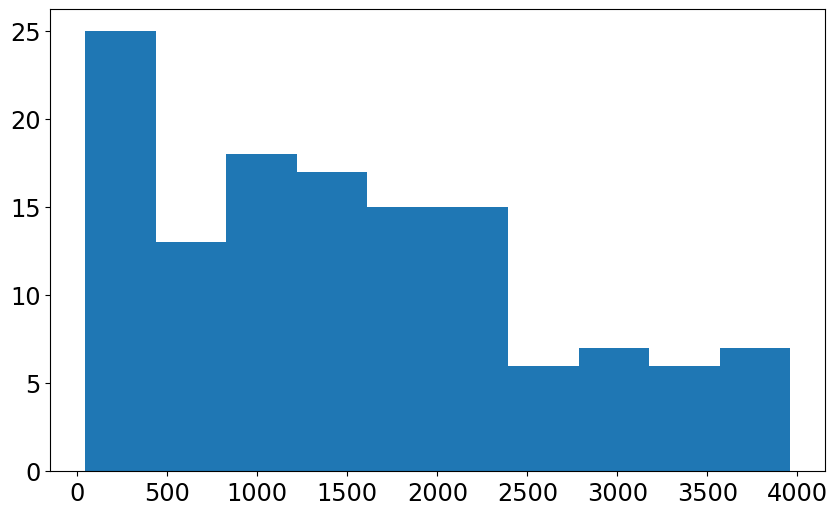

In [36]:
plt.hist(data.astype(np.float))

Unexpected err=AttributeError("'AxesSubplot' object has no attribute 'show'"), type(err)=<class 'AttributeError'> for slot_Shape_x
Unexpected err=AttributeError("'AxesSubplot' object has no attribute 'show'"), type(err)=<class 'AttributeError'> for slot_Shape_y
Unexpected err=AttributeError("'AxesSubplot' object has no attribute 'show'"), type(err)=<class 'AttributeError'> for slot_Shape_xx
Unexpected err=AttributeError("'AxesSubplot' object has no attribute 'show'"), type(err)=<class 'AttributeError'> for slot_Shape_yy
Unexpected err=AttributeError("'AxesSubplot' object has no attribute 'show'"), type(err)=<class 'AttributeError'> for slot_Shape_xy
Unexpected err=AttributeError("'AxesSubplot' object has no attribute 'show'"), type(err)=<class 'AttributeError'> for slot_ApFlux_instFlux
Unexpected err=AttributeError("'AxesSubplot' object has no attribute 'show'"), type(err)=<class 'AttributeError'> for slot_CalibFlux_instFlux
Unexpected err=AttributeError("'AxesSubplot' object has no at

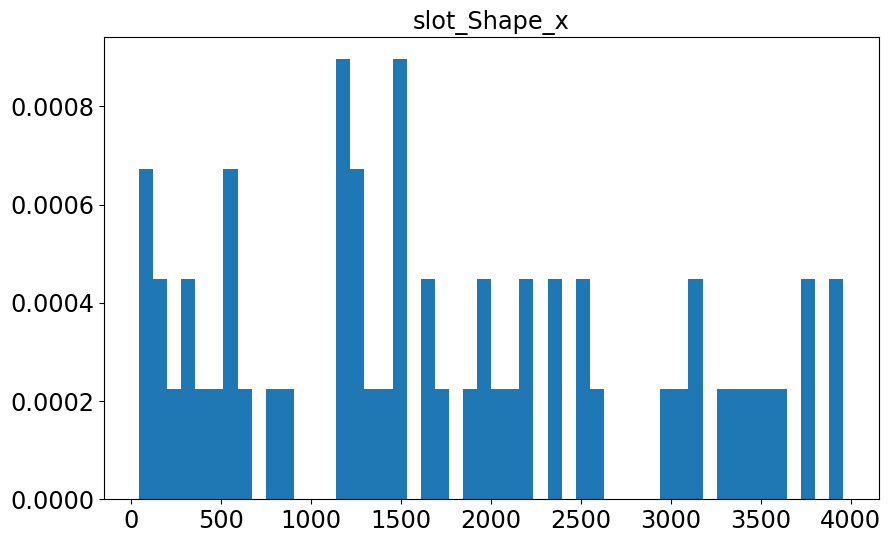

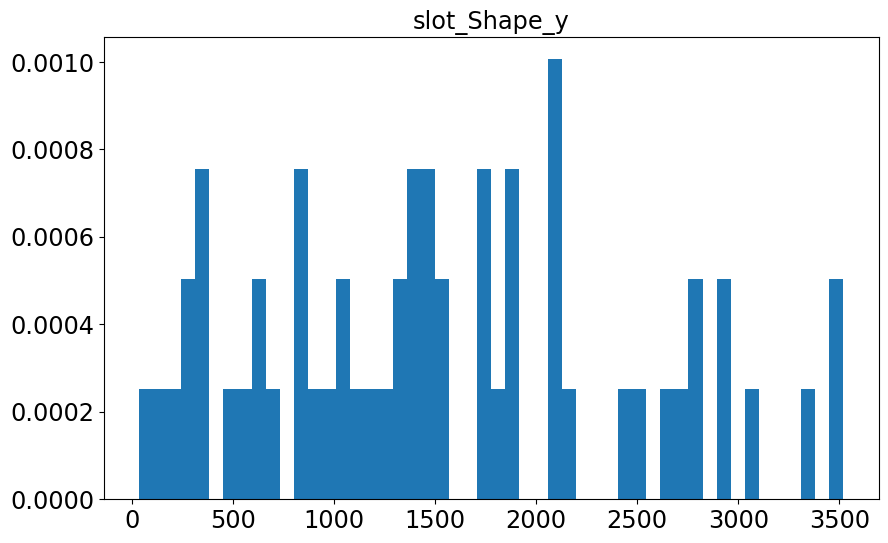

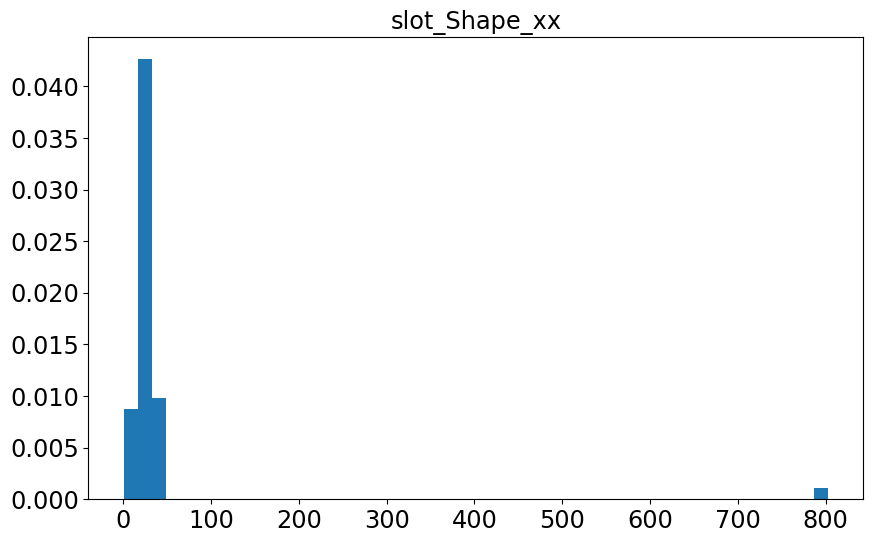

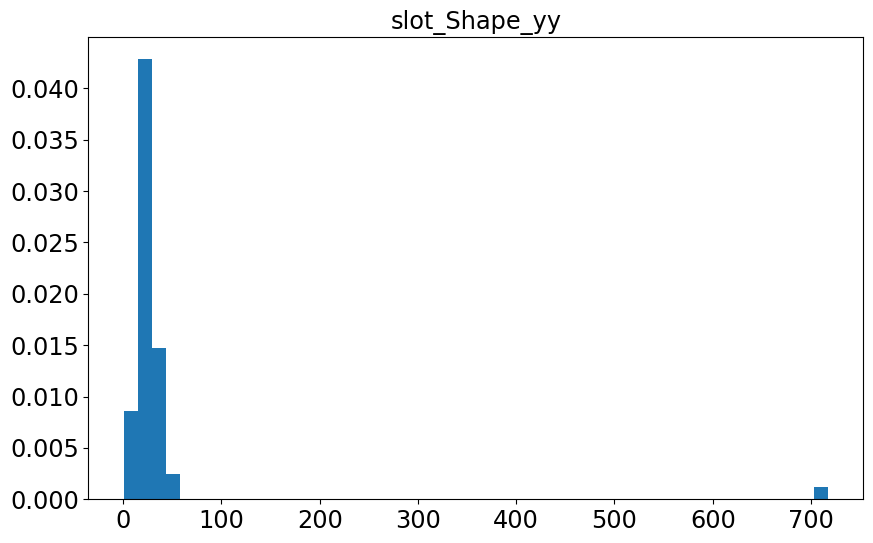

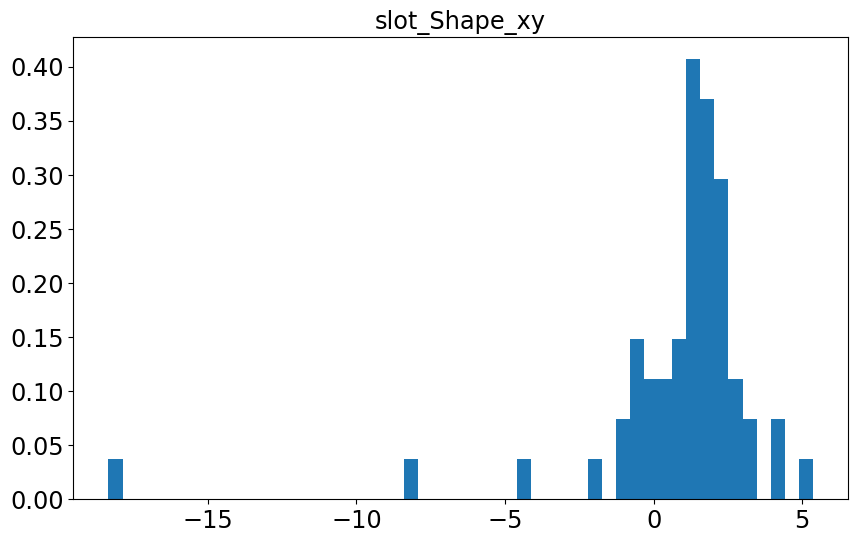

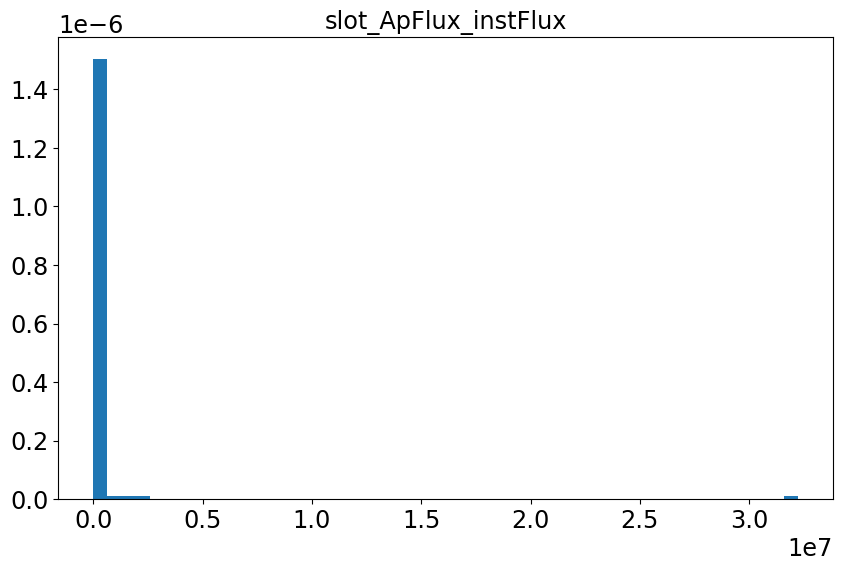

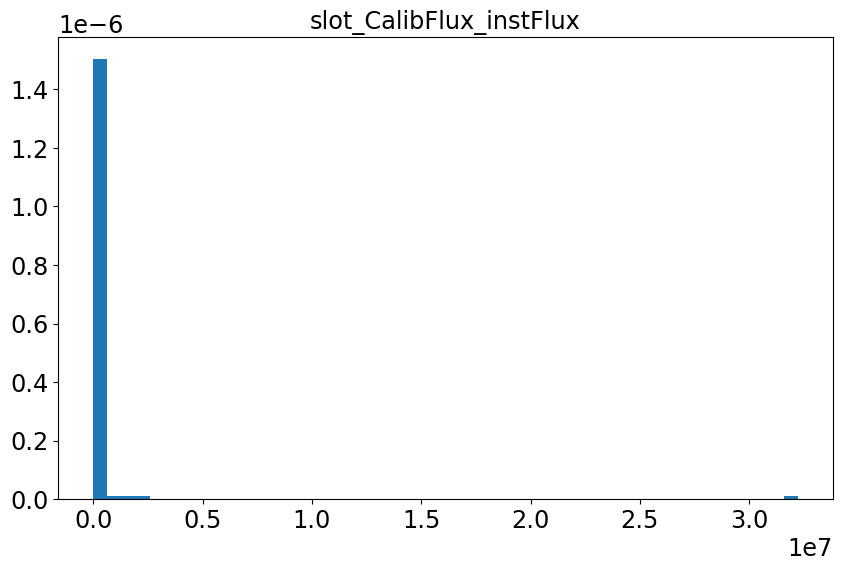

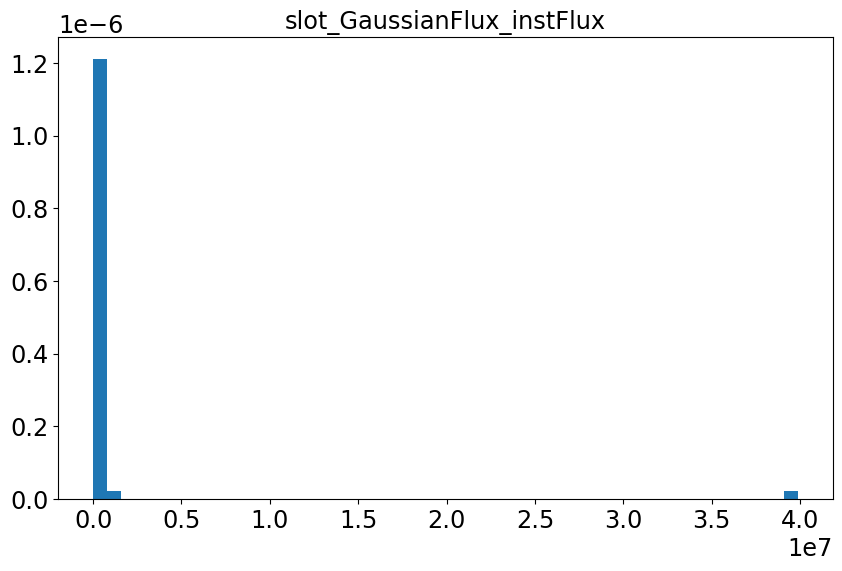

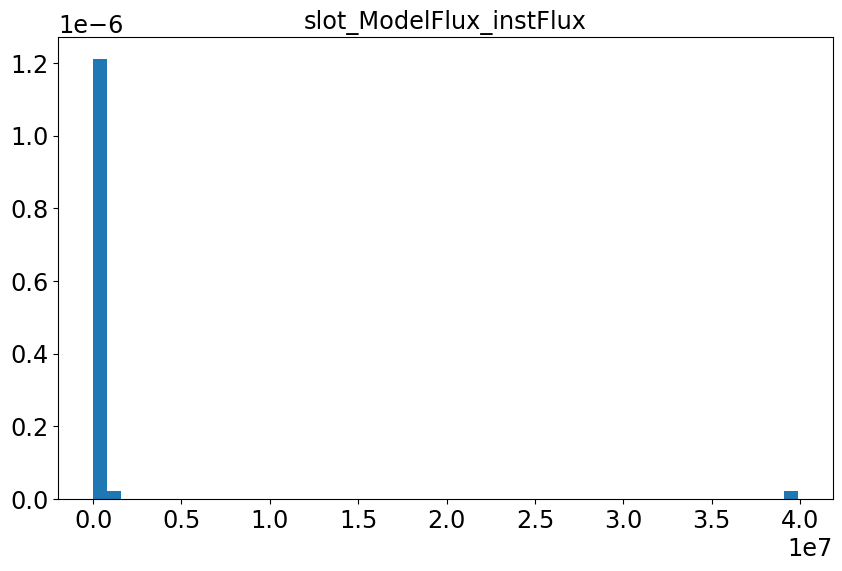

In [39]:
#for colname in colnumns_names:
for colname in  ["slot_Shape_x","slot_Shape_y",
                 "slot_Shape_xx",
                 "slot_Shape_yy",
                 "slot_Shape_xy",
                 "slot_ApFlux_instFlux",
                 "slot_CalibFlux_instFlux",
                 "slot_GaussianFlux_instFlux",
                 "slot_ModelFlux_instFlux"]:

    
    try:
        fig = plt.figure()
        ax=fig.add_subplot(1,1,1)
        data=df_visit_sel[colname].values
        data = data[~np.isnan(data)]
        mind =data.min()
        maxd = data.max()
        ax.hist(data,50,density=True, histtype='bar')
        ax.set_title(colname)
        ax.show()
    except Exception as err:
        print(f"Unexpected {err=}, {type(err)=} for {colname}")